## Interference analysis - importing and plotting raw data

/Users/cal_lamont/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


Text(0.5,1,'FFT of I data')

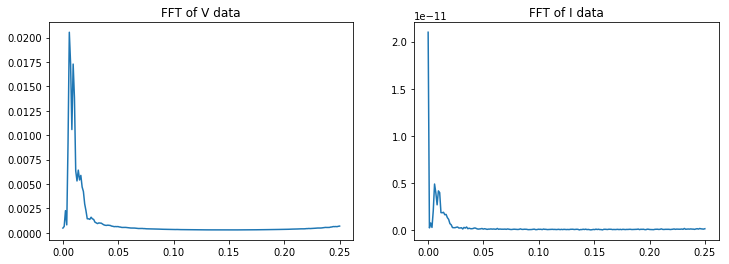

In [99]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

raw = np.genfromtxt("raw.csv", delimiter=",")
raw = raw[150:-30,0:3]  # Capture only T, V and I from 5 min in.

# Analyse the FFT of the raw data
sample_freq = 0.5
xf = np.linspace(0.0, sample_freq/2.0, raw.shape[0]/2.0)
V_fft = scipy.fft(raw[:,1])
I_fft = scipy.fft(raw[:,2])
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(x, 2/N * np.abs(V_fft[:N//2]))
axes[1].plot(x, 2/N * np.abs(I_fft[:N//2]))
axes[0].set_title("FFT of V data")
axes[1].set_title("FFT of I data")

In [97]:
def data_filter(data, freq, filter_type='highpass'):
    sample_freq = 0.5  # in samples/sec
    N = sample_freq / 2  # in samples/sec
    N = N * np.pi * 1  # in rad/sample

    # Determine the normlised frequencies for the bandpass filter
    freq = (np.array(freq) * np.pi * 1) / N  # samples/sec
    b, a = scipy.signal.butter(2, freq, filter_type)
    data = scipy.signal.filtfilt(b, a, data.tolist())
    return data

Text(0.5,1,'Filtered I data')

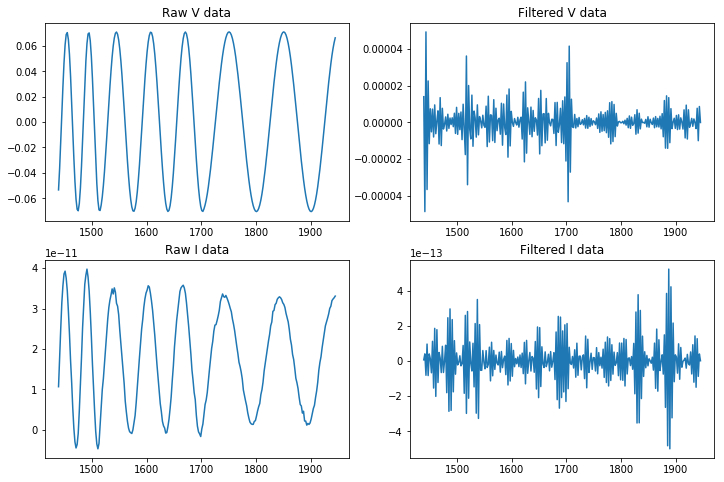

In [101]:
# Apply a high pass filter to remove applied EIS signal.
V_filt = data_filter(raw[:,1], 0.2)
I_filt = data_filter(raw[:,2], 0.2)
V_fft = scipy.fft(V_filt)
I_fft = scipy.fft(I_filt)

# Plot comparison of V and I signal after filtering.
fig, axes = plt.subplots(2,2,figsize=(12,8))
axes[0,0].plot(raw[:,0], raw[:,1])
axes[0,1].plot(raw[:,0], V_filt)
axes[0,0].set_title("Raw V data")
axes[0,1].set_title("Filtered V data")
axes[1,0].plot(raw[:,0], raw[:,2])
axes[1,1].plot(raw[:,0], I_filt)
axes[1,0].set_title("Raw I data")
axes[1,1].set_title("Filtered I data")